# Starbucks Location Analysis

## Importing CSV File And Cleaning

In [ ]:
!pip install pandas
!pip install sqlalchemy
!pip install pymongo
!pip install matplotlib
!pip install -U matplotlib==3.2
!pip install chart-studio
!pip install seaborn

In [47]:
# Importing library
import pandas as pd
store_path = r"F:\nci-projects\starbucks-twitter-analysis\vrushali-surve\directory.csv" # file path

In [48]:
# read CSV into a dataframe
store_data = pd.read_csv(store_path)
store_data.head(5) #to get the first n rows

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


## Transfering Data Into Mongodb

In [18]:
from pymongo import MongoClient
import pandas as pd
import json

db = MongoClient("mongodb://localhost:27017/")

def csv_to_json(filename, header=None):
    data = pd.read_csv(filename, header=header)
    return data.to_dict('records')

pos_col = db["twitter_database"]

location_df = (r"F:\nci-projects\starbucks-twitter-analysis\vrushali-surve\directory.csv")

db.twitter_database.location.insert_many(csv_to_json(location_df, header=0))
print("Your CSV file Imported Successfully")

Your CSV file Imported Successfully


In [49]:
from pymongo import MongoClient
import pandas as pd
client = MongoClient("mongodb://localhost:27017/")
# Database Name
db = client["twitter_database"]
# Collection Name
col = db["location"]
allLocationData = col.find()

allLocationDict = {}

dfAllLocation = pd.DataFrame(list(allLocationData))

print(dfAllLocation.head(5))

                        _id      Brand  Store Number        Store Name  \
0  60822bc1ecb09a4ad0b67f1c  Starbucks  47370-257954     Meritxell, 96   
1  60822bc1ecb09a4ad0b67f1d  Starbucks  22331-212325  Ajman Drive Thru   
2  60822bc1ecb09a4ad0b67f1e  Starbucks  47089-256771         Dana Mall   
3  60822bc1ecb09a4ad0b67f1f  Starbucks  22126-218024        Twofour 54   
4  60822bc1ecb09a4ad0b67f20  Starbucks  17127-178586      Al Ain Tower   

  Ownership Type                   Street Address              City  \
0       Licensed                Av. Meritxell, 96  Andorra la Vella   
1       Licensed             1 Street 69, Al Jarf             Ajman   
2       Licensed     Sheikh Khalifa Bin Zayed St.             Ajman   
3       Licensed                  Al Salam Street         Abu Dhabi   
4       Licensed  Khaldiya Area, Abu Dhabi Island         Abu Dhabi   

  State/Province Country Postcode Phone Number                 Timezone  \
0              7      AD    AD500    376818720  GMT+1

In [50]:
# created new df with required columns
new_dfAllLocation = dfAllLocation[["Store Number","Store Name","Ownership Type","Street Address","City","State/Province","Country","Postcode","Phone Number","Longitude","Latitude"]]

In [51]:
# headers to change
new_dfAllLocation = new_dfAllLocation.rename(columns={"Store Number":"store_number","Store Name":"store_name","Ownership Type":"ownership_type",
                                            "Street Address":"street_address","City":"city", "State/Province": "state_province", "Country":"country",
                                            "Postcode": "postcode", "Phone Number": "phone_number"
                                            ,"Longitude":"longitude","Latitude":"latitude"})

In [52]:
print(new_dfAllLocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   store_number    25600 non-null  object 
 1   store_name      25600 non-null  object 
 2   ownership_type  25600 non-null  object 
 3   street_address  25598 non-null  object 
 4   city            25585 non-null  object 
 5   state_province  25600 non-null  object 
 6   country         25600 non-null  object 
 7   postcode        24078 non-null  object 
 8   phone_number    18739 non-null  object 
 9   longitude       25599 non-null  float64
 10  latitude        25599 non-null  float64
dtypes: float64(2), object(9)
memory usage: 2.1+ MB
None


In [53]:
# removed N/A
new_dfAllLocation = new_dfAllLocation.dropna(subset = ["postcode"])

In [54]:
# removed N/A
new_dfAllLocation = new_dfAllLocation.dropna(subset = ["phone_number"])

In [55]:
# change column datatype
new_dfAllLocation['longitude']=new_dfAllLocation['longitude'].astype(int)
new_dfAllLocation['latitude']=new_dfAllLocation['latitude'].astype(int)

In [56]:
new_dfAllLocation.dtypes

store_number      object
store_name        object
ownership_type    object
street_address    object
city              object
state_province    object
country           object
postcode          object
phone_number      object
longitude          int32
latitude           int32
dtype: object

In [57]:
# Find all the NaN Values in the DataFrame
new_dfAllLocation.isnull().sum()

store_number      0
store_name        0
ownership_type    0
street_address    2
city              0
state_province    0
country           0
postcode          0
phone_number      0
longitude         0
latitude          0
dtype: int64

In [59]:
# Type of Starbucks
new_dfAllLocation["ownership_type"].value_counts().head(4)

Company Owned    10871
Licensed          6148
Joint Venture      912
Franchise          155
Name: ownership_type, dtype: int64

In [60]:
# Type of Starbucks
new_dfAllLocation["country"].value_counts()

US    13122
CA     1310
CN     1051
GB      659
TH      281
PH      223
KR      216
DE      152
JP      143
TR      141
MY      138
FR       82
ES       75
CH       55
ID       48
IE       47
PL       45
BR       43
TW       35
AR       29
RU       29
CZ       26
VN       23
AT       17
AE       13
HU       12
GR       10
NL       10
JO        8
OM        6
SG        6
PT        6
SE        3
NO        3
KW        3
AZ        3
ZA        2
DK        2
BH        2
CL        1
CO        1
BE        1
NZ        1
AD        1
LB        1
FI        1
Name: country, dtype: int64

In [61]:
# adding new column for country name with respect to country code
countries = pd.read_csv(r'F:\nci-projects\starbucks-twitter-analysis\vrushali-surve\countries.csv', names=['country_name', 'code'])
countries.head(5)

,country_name,code
NaN,country_name,code
1.0,Afghanistan,AF
2.0,Albania,AL
3.0,Algeria,DZ
4.0,American Samoa,AS


In [62]:
new_dfAllLocation = new_dfAllLocation.merge(countries, left_on='country', right_on='code')
new_dfAllLocation.drop('code', axis=1, inplace=True)
new_dfAllLocation.head(5)

,store_number,store_name,ownership_type,street_address,city,state_province,country,postcode,phone_number,longitude,latitude,country_name
0,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,1,42,Andorra
1,1579-122101,HCT Abu Dhabi Women's College Block,Licensed,"Najda Street, Higher Colleges of Technology",Abu Dhabi,AZ,AE,3167,26426280,54,24,United Arab Emirates (the)
2,32595-122105,Standard Chartered Building,Licensed,"Khalidiya St., Beside Union Cooperative Society",Abu Dhabi,AZ,AE,3167,26359275,55,24,United Arab Emirates (the)
3,32767-131566,Shangri-La Souq,Licensed,"Shangri-La Souk, Um Al Nar",Abu Dhabi,AZ,AE,3167,25581641,54,24,United Arab Emirates (the)
4,32640-131563,Tawam Hospital,Licensed,"Al Ain Abu Dhabi Rd, Khalifa Bin Zayed, Al Mak...",Al Ain,AZ,AE,3167,37677581,55,24,United Arab Emirates (the)


## Map Visualization 

#### Plotly

In [63]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import pandas as pd
import chart_studio.plotly as pl

In [64]:
data = dict(
        type = 'choropleth',
        colorscale = 'Portland',
        locations = ['United States of America','Canada','China','United Kingdom of Great Britain and Northern Ireland','Thailand','Philippines','Korea','Germany','Japan','Turkey','Malaysia','France','Spain','Switzerland','Indonesia','Ireland','Poland','Brazil','Taiwan','Russian Federation','Argentina','Czechia','Viet Nam','Austria','United Arab Emirates','Hungary','Greece','Netherlands','Jordan','Portugal','Oman','Singapore','Azerbaijan','Kuwait','Norway','Sweden','South Africa','Denmark','Bahrain','Chile','Lebanon','Finland','Andorra','Belgium','Colombia','New Zealand'],
        locationmode = "country names",
        z=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0],
    
        text = ['US','CA','CN','GB','TH','PH','KR','DE','JP','TR','MY','FR','ES','CH','ID','IE','PL','BR','TW','RU','AR','CZ','VN','AT','AE','HU','GR','NL','JO','PT','OM','SG','AZ','KW','NO','SE','ZA','DK','BH','CL','LB','FI','AD','BE','CO','NZ'],
        colorbar = {'title':'Country', 'len':200,'lenmode':'pixels'}
      )

In [65]:
layout = dict(geo = {'scope':'world'})

In [66]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

#### Density Maps 

In [67]:
import plotly.express as px
import pandas as pd

In [68]:
fig = px.density_mapbox(new_dfAllLocation, lat='latitude', lon='longitude',  radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [71]:
import plotly.express as px 
  
#plotting the pie chart
fig = px.pie(new_dfAllLocation, values="country", names="city") 
  
# showing the plot
fig.show()


### Matplotlib

In [37]:
import matplotlib.pyplot as plt

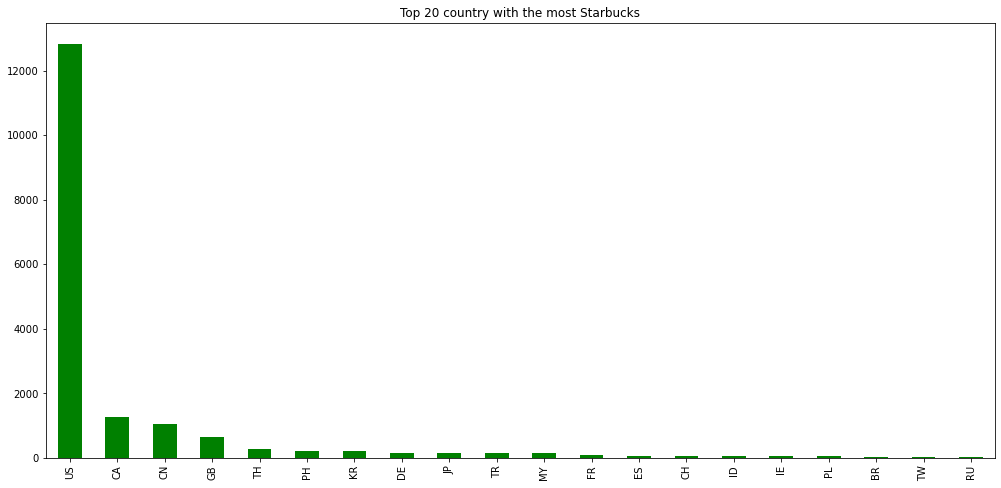

In [38]:
#Top 20 Cities with the most Starbucks
figure = plt.figure(figsize=(17,8))
axes = figure.add_subplot(111)
axes.set(title = "Top 20 country with the most Starbucks")
dfAllLocationSelectiveCol.country.value_counts().head(20).plot(kind="bar", color = "green")

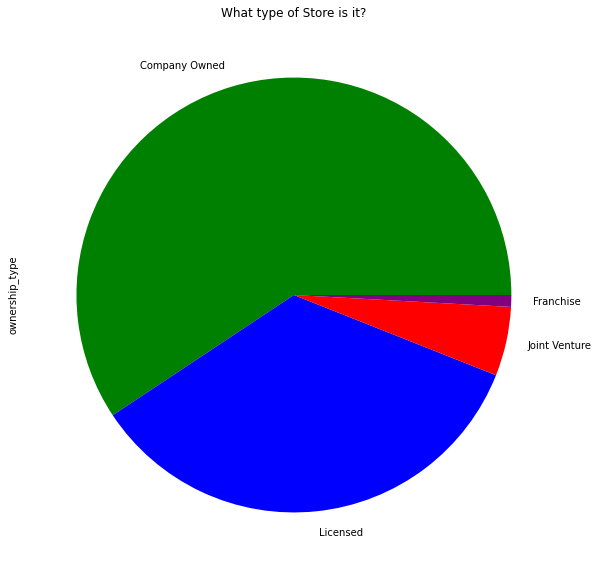

In [39]:
#type of Store
figure = plt.figure(figsize=(10,10))
axes = figure.add_subplot(111)
axes.set(title = "What type of Store is it?")
dfAllLocationSelectiveCol['ownership_type'].value_counts().plot(kind="pie", colors = ["green", "blue","red","purple"])
plt.show()

### Seaborn

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [46]:
print(dfAllLocationSelectiveCol.shape)

(17740, 12)


C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 19978 missing from current font.

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 28023 missing from current font.

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 24066 missing from current font.

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 49436 missing from current font.


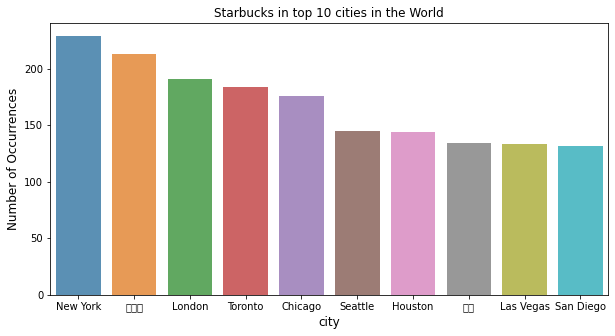

In [47]:
# Plotting a bar graph of the number of stores in each city, for the first ten cities listed
# in the column 'City'
city_count  = dfAllLocationSelectiveCol['city'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Starbucks in top 10 cities in the World')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [51]:
newyorkTimezone = dfAllLocationSelectiveCol[dfAllLocationSelectiveCol.Timezone == 'GMT-05:00 America/New_York']['City'].value_counts()[:10]
plt.figure()
sns.barplot(newyorkTimezone.index, newyorkTimezone.values, alpha=0.8)
plt.title('Starbucks in top 10 cities in New yord timezone')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Timezone'

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\vrushali\Anaconda3\envs\location-analysis\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



AttributeError: 'PolyCollection' object has no property 'stat_func'

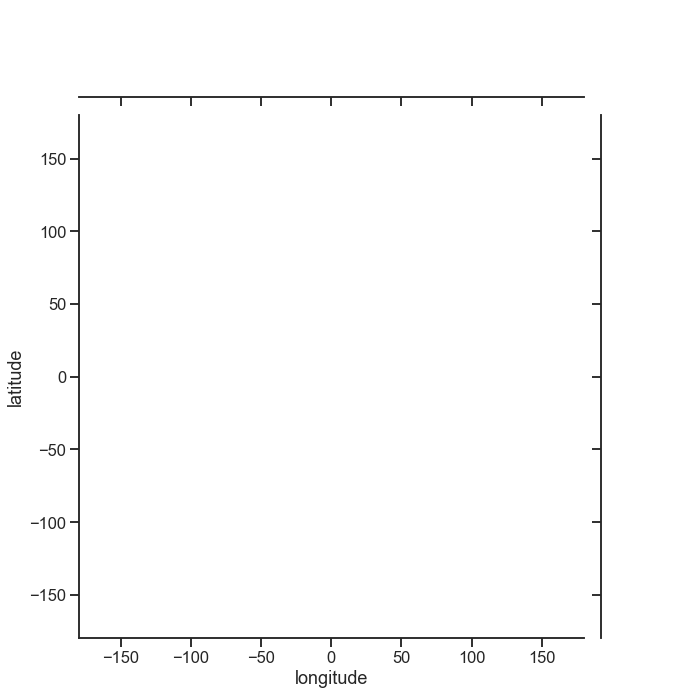

In [50]:
#show the entire world
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_context("talk")

x = dfAllLocationSelectiveCol['longitude']
y = dfAllLocationSelectiveCol['latitude']

sns.jointplot(x, y, kind="hex", size=10, color="#4CB391", stat_func=None, 
              xlim=(-180,180), ylim=(-180,180))

In [53]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = dfAllLocationSelectiveCol.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

In [57]:
import plotly.express as px
fig=px.histogram(dfAllLocationSelectiveCol,x="longitude",y="latitude",color="country_name")
fig.show()

In [62]:
# Geospatial
from pymongo import MongoClient
import pymongo
import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

	
client = MongoClient("mongodb://localhost:27017/")

course_client = pymongo.MongoClient(client)

# sample Database
db = course_client['Startbucks_Location_db']

# sample Collection
col = db['Location']

l = list(col.find({}))

lngs = [x['longitude'] for x in l]
lats = [x['latitude'] for x in l]

# Clear the figure (this is nice if you
# execute the cell multiple times)
plt.clf()

# Set the size of our figure
plt.figure(figsize =(14, 8))

# Set the center of our map with our
# first pair of coordinates and set
# the projection
m = Basemap(lat_0 = lats[0],
			lon_0 = lngs[0],
			projection ='cyl')

# Draw the coastlines and the states
m.drawcoastlines()
m.drawstates()

# Convert our coordinates to the system
# that the projection uses
x, y = m(lngs, lats)

# Plot our converted coordinates
plt.scatter(x, y)

# Display our beautiful map
plt.show()

TypeError: 'MongoClient' object is not iterable